# TP1 Régression lineaire

## II- Régression linéaire multiple avec la méthode des moindre carrés

### Importation des librairies

In [38]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd


### II-1. Lecture des données 

In [39]:
df = pd.read_csv('./house.txt')

### II-2. Conversion du txt vers csv

In [40]:
df.to_csv('./house.csv',index=False)
features=['area','bedrooms','floors','age','price']
house = pd.read_csv('./house.csv',names=features)
house.head()

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


### II-3. extraction des features et du label

In [41]:
X=house.iloc[:,:4]   # diviser house data en X (features) et y (labels)
y=house.iloc[:,4]

In [42]:
X.head()

,area,bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


In [43]:
y.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

### II-4. Division du dataset en données d'entrainement et données de test

In [44]:
X=np.array(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)


### II-5. regression linaire multiple avec la méthode des moindre carrés

### II-5-1 Calcul des coefficients a_hat

Les parametres du modèle de regression linéaire multiple sont estimés par la méthode des moindres carrés.

Les coefficients sont calculés par la formule suivante:

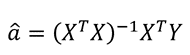

avec 

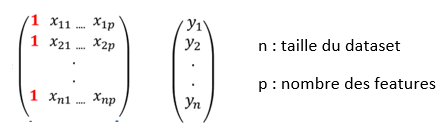

In [45]:
#todo
# ajouter une colonne de 1 à X_train
# XX_train  sera la  matrice X_train à laquelle vous avez ajouté une colonne de 1
print(pd.DataFrame(X_train))
XX_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
#XX_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
print(pd.DataFrame(XX_train))

#(363, 3)

         0    1    2      3
0   1486.0  3.0  1.0   57.0
1    904.0  3.0  1.0   55.0
2   1768.0  3.0  2.0   18.0
3   1470.0  3.0  2.0   24.0
4   1040.0  3.0  1.0   25.0
..     ...  ...  ...    ...
61  1432.0  2.0  1.0   43.0
62  1073.0  2.0  1.0  100.0
63  1392.0  3.0  1.0   64.0
64  1616.0  3.0  1.0   16.0
65  1552.0  3.0  1.0   16.0

[66 rows x 4 columns]
      0       1    2    3      4
0   1.0  1486.0  3.0  1.0   57.0
1   1.0   904.0  3.0  1.0   55.0
2   1.0  1768.0  3.0  2.0   18.0
3   1.0  1470.0  3.0  2.0   24.0
4   1.0  1040.0  3.0  1.0   25.0
..  ...     ...  ...  ...    ...
61  1.0  1432.0  2.0  1.0   43.0
62  1.0  1073.0  2.0  1.0  100.0
63  1.0  1392.0  3.0  1.0   64.0
64  1.0  1616.0  3.0  1.0   16.0
65  1.0  1552.0  3.0  1.0   16.0

[66 rows x 5 columns]


In [46]:
# todo 
#calculer les coefficents a_hat 

#pour inverser une matrice A 
#B= np.linalg.inv(A)

def cal_coeff(X_train, y_train):
    
   
  """
      Calculate the coefficients a_hat for multiple linear regression using the inverse.

      Args:
        X_train : Data, n examples 
        y_train : Label, n labels  

      Returns:
          a_hat : Coefficients for the linear regression model
      """
      
  # Calculate the coefficients a_hat using the inverse
  a_hat = np.linalg.inv(X_train.T @ X_train).dot(X_train.T).dot(y_train)
      
  return a_hat
a_hat = cal_coeff(XX_train, y_train)

print(a_hat)


[230.67976645   0.26553886 -36.26620653 -68.63386872  -1.39948582]


### II-5-2. Faire la prédiction \$\$\hat{Y} = \hat{a} X\$\$

In [47]:
#todo
y_hat = XX_train @ a_hat

y_hat = y_hat.reshape(-1, 1)
 
print(y_hat[:4,:])

[[368.06733445]
 [216.3226888 ]
 [428.89537151]
 [341.36787593]]


### II-5.3. Calcul de la fonction coût  
\$\$J = \frac{1}{n} \sum\limits\_{i=1}^{n}
(Y - \hat{Y})^2\$\$

In [48]:
# todo
def J(y_hat, y):
    return np.mean((y_hat - y) ** 2)


y_train=np.array(y_train).reshape(-1,1)
print(y_train.shape)
J(y_hat,y_train)

(66, 1)


395.58312266284327

### II-6-2. Régression linéaire multiple avec sklearn

In [49]:
from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(X_train,y_train)

print('Intercept: \n', Regressor.intercept_)
print('Coefficients: \n', Regressor.coef_)
 

Intercept: 
 [230.67976645]
Coefficients: 
 [[  0.26553886 -36.26620653 -68.63386872  -1.39948582]]


In [50]:
#prediction 
y_hat=Regressor.predict(X_train)
y_hat.shape
print(y_hat[:4])

[[368.06733445]
 [216.3226888 ]
 [428.89537151]
 [341.36787593]]


In [51]:
# fonction coût
J(y_hat,y_train)

395.58312266284304

In [52]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_train,y_hat) 

395.58312266284304

<class 'numpy.ndarray'>


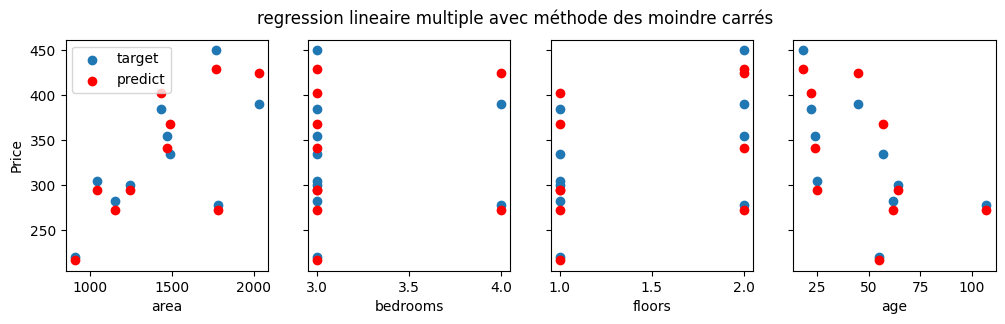

In [53]:
# plot predictions and targets vs original features    
fig,ax=pl.subplots(1,4,figsize=(12,3),sharey=True)
X_train=np.array(X_train)

print(type(y_hat))
for i in range(len(ax)):
     
    ax[i].scatter(X_train[:10,i],y_train[:10], label = 'target')
    ax[i].set_xlabel(features[i])
    ax[i].scatter(X_train[:10,i],y_hat[:10],color='red', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("regression lineaire multiple avec méthode des moindre carrés")
pl.show()